In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
train_file_path = r"/Users/farihatahosinboishakhi/Documents/Uconn Courses/Bayesian ML /Final Project/E-MTAB-11349-2/ArrayExpress-normalized.csv"
metadata_file_path = r"/Users/farihatahosinboishakhi/Documents/Uconn Courses/Bayesian ML /Final Project/E-MTAB-11349-2/E-MTAB-11349.sdrf.txt"

def process_gene_expression_data(file_path, metadata_path):
    matrix = pd.read_csv(file_path)
    
    matrix = matrix.set_index('gene')
    matrix = matrix.T
    
    processed_data = pd.DataFrame(matrix)
    
    features_df = pd.read_csv(metadata_path, sep='\t', index_col=0)
    
    return processed_data, features_df

train_data, train_features = process_gene_expression_data(train_file_path, metadata_file_path)

In [46]:
train_data_cleaned = train_data.drop(['Unnamed: 0', 'refseq'], errors='ignore')

train_data_cleaned.index.name = 'Source Name'

train_data_cleaned

gene,ACADS,ACADVL,ACAT1,PSEN1,ADA,ADRB2,ADRB3,ADSL,AGA,ALAD,...,ALOX12-AS1,CYP21A1P,LOC100506990,LOC100506123,LINC01721,PCAT19,ANKRD20A5P,LINC00547,LINC00941,LINC00700
Source Name,,,,,,,,,,,,,,,,,,,,,
Sample 1,71.394731,202.285072,51.923441,1502.534571,155.770323,236.900699,4.326953,283.415448,122.236434,257.453728,...,493.2727,18.38955,100.6017,188.2225,3.245215,33.53389,23.79824,0.0,175.2416,55.16866
Sample 2,104.829005,308.215194,71.677952,1245.404416,215.033856,267.000371,6.271821,268.79232,120.956544,275.960115,...,422.8999,42.1108,68.09405,225.7855,8.959744,27.77521,13.43962,1.791949,116.4767,42.1108
Sample 3,173.466488,271.920441,80.87289,930.624269,257.855591,470.000418,16.408992,350.449189,134.78815,364.51404,...,307.0826,4.688283,104.3143,294.1898,5.860354,21.09728,39.85041,2.344142,80.87289,26.95763
Sample 4,103.796604,232.756022,80.992805,754.098056,247.696442,394.741631,6.290703,419.118106,61.334357,319.253192,...,392.3826,3.93169,69.19774,379.8012,7.077041,38.53056,18.87211,0.786338,99.07858,40.10323
Sample 5,83.472519,219.115362,57.861632,1089.885502,145.128357,181.173308,11.382616,315.8676,113.826162,239.983492,...,352.8611,128.0544,115.7233,518.8576,48.37612,129.9515,29.40509,36.9935,350.0154,207.7327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample 586,147.529335,278.935246,71.74924,1035.123862,216.860061,388.574534,11.286397,366.80791,112.863972,274.098219,...,336.1734,12.89874,80.61712,232.9835,4.837027,24.99131,24.99131,4.030856,91.09735,42.72708
Sample 587,94.187393,306.109028,53.515564,1343.240664,172.320117,187.304475,6.421868,278.280934,126.296732,323.234008,...,325.3746,5.351556,96.32802,180.8826,3.210934,34.24996,11.77342,8.56249,107.0311,62.07805
Sample 588,87.027568,230.201954,45.853235,2358.166354,111.357856,363.082756,10.293583,320.036862,79.541325,230.201954,...,417.358,10.29358,78.60555,126.3303,6.550462,33.68809,4.678901,2.807341,174.9909,46.78901


In [47]:
train_data_cleaned.dtypes

gene
ACADS         object
ACADVL        object
ACAT1         object
PSEN1         object
ADA           object
               ...  
PCAT19        object
ANKRD20A5P    object
LINC00547     object
LINC00941     object
LINC00700     object
Length: 14182, dtype: object

In [48]:
train_features

,Characteristics[organism],Characteristics[age],Unit[time unit],Term Source REF,Term Accession Number,Characteristics[developmental stage],Characteristics[sex],Characteristics[individual],Characteristics[disease],Characteristics[organism part],...,Performer,Assay Name,Technology Type,Protocol REF.4,Derived Array Data File,Comment [Derived ArrayExpress FTP file],Protocol REF.5,Derived Array Data File.1,Comment [Derived ArrayExpress FTP file].1,Factor Value[disease]
Source Name,,,,,,,,,,,,,,,,,,,,,
Sample 1,Homo sapiens,34,year,EFO,UO_0000036,adult,male,1,Crohn's disease,blood,...,Wellcome Trust Clinical Research Facility in E...,Sample 1,sequencing assay,P-MTAB-117949,ArrayExpress-normalized.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,P-MTAB-117949,ArrayExpress-raw.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,Crohn's disease
Sample 2,Homo sapiens,49,year,EFO,UO_0000036,adult,female,2,normal,blood,...,Wellcome Trust Clinical Research Facility in E...,Sample 2,sequencing assay,P-MTAB-117949,ArrayExpress-normalized.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,P-MTAB-117949,ArrayExpress-raw.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,normal
Sample 3,Homo sapiens,27,year,EFO,UO_0000036,adult,male,3,normal,blood,...,Wellcome Trust Clinical Research Facility in E...,Sample 3,sequencing assay,P-MTAB-117949,ArrayExpress-normalized.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,P-MTAB-117949,ArrayExpress-raw.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,normal
Sample 4,Homo sapiens,9,year,EFO,UO_0000036,adult,male,4,normal,blood,...,Wellcome Trust Clinical Research Facility in E...,Sample 4,sequencing assay,P-MTAB-117949,ArrayExpress-normalized.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,P-MTAB-117949,ArrayExpress-raw.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,normal
Sample 5,Homo sapiens,34,year,EFO,UO_0000036,adult,female,5,normal,blood,...,Wellcome Trust Clinical Research Facility in E...,Sample 5,sequencing assay,P-MTAB-117949,ArrayExpress-normalized.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,P-MTAB-117949,ArrayExpress-raw.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample 586,Homo sapiens,25,year,EFO,UO_0000036,adult,male,586,Crohn's disease,blood,...,Wellcome Trust Clinical Research Facility in E...,Sample 586,sequencing assay,P-MTAB-117949,ArrayExpress-normalized.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,P-MTAB-117949,ArrayExpress-raw.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,Crohn's disease
Sample 587,Homo sapiens,44,year,EFO,UO_0000036,adult,male,587,normal,blood,...,Wellcome Trust Clinical Research Facility in E...,Sample 587,sequencing assay,P-MTAB-117949,ArrayExpress-normalized.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,P-MTAB-117949,ArrayExpress-raw.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,normal
Sample 588,Homo sapiens,36,year,EFO,UO_0000036,adult,female,588,Crohn's disease,blood,...,Wellcome Trust Clinical Research Facility in E...,Sample 588,sequencing assay,P-MTAB-117949,ArrayExpress-normalized.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,P-MTAB-117949,ArrayExpress-raw.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,Crohn's disease


In [49]:
columns_to_keep = ['Characteristics[age]', 'Characteristics[sex]', 'Characteristics[disease]']
filtered_train_features = train_features[columns_to_keep]
filtered_train_features = filtered_train_features.rename(columns={
    'Characteristics[age]': 'Age',
    'Characteristics[sex]': 'Sex',
    'Characteristics[disease]': 'Disease'
    
})

disease_mapping = {
    'normal': 0,
    "Crohn's disease": 1,
    'ulcerative colitis': 2
}
sicks = {
    'normal': 0,
    "Crohn's disease": 1,
    'ulcerative colitis': 1
}

filtered_train_features['Disease_Label'] = filtered_train_features['Disease'].map(disease_mapping)
filtered_train_features['Sick'] = filtered_train_features['Disease'].map(sicks)
filtered_train_features

,Age,Sex,Disease,Disease_Label,Sick
Source Name,,,,,
Sample 1,34,male,Crohn's disease,1,1
Sample 2,49,female,normal,0,0
Sample 3,27,male,normal,0,0
Sample 4,9,male,normal,0,0
Sample 5,34,female,normal,0,0
...,...,...,...,...,...
Sample 586,25,male,Crohn's disease,1,1
Sample 587,44,male,normal,0,0
Sample 588,36,female,Crohn's disease,1,1


In [50]:
train_data_cleaned

gene,ACADS,ACADVL,ACAT1,PSEN1,ADA,ADRB2,ADRB3,ADSL,AGA,ALAD,...,ALOX12-AS1,CYP21A1P,LOC100506990,LOC100506123,LINC01721,PCAT19,ANKRD20A5P,LINC00547,LINC00941,LINC00700
Source Name,,,,,,,,,,,,,,,,,,,,,
Sample 1,71.394731,202.285072,51.923441,1502.534571,155.770323,236.900699,4.326953,283.415448,122.236434,257.453728,...,493.2727,18.38955,100.6017,188.2225,3.245215,33.53389,23.79824,0.0,175.2416,55.16866
Sample 2,104.829005,308.215194,71.677952,1245.404416,215.033856,267.000371,6.271821,268.79232,120.956544,275.960115,...,422.8999,42.1108,68.09405,225.7855,8.959744,27.77521,13.43962,1.791949,116.4767,42.1108
Sample 3,173.466488,271.920441,80.87289,930.624269,257.855591,470.000418,16.408992,350.449189,134.78815,364.51404,...,307.0826,4.688283,104.3143,294.1898,5.860354,21.09728,39.85041,2.344142,80.87289,26.95763
Sample 4,103.796604,232.756022,80.992805,754.098056,247.696442,394.741631,6.290703,419.118106,61.334357,319.253192,...,392.3826,3.93169,69.19774,379.8012,7.077041,38.53056,18.87211,0.786338,99.07858,40.10323
Sample 5,83.472519,219.115362,57.861632,1089.885502,145.128357,181.173308,11.382616,315.8676,113.826162,239.983492,...,352.8611,128.0544,115.7233,518.8576,48.37612,129.9515,29.40509,36.9935,350.0154,207.7327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample 586,147.529335,278.935246,71.74924,1035.123862,216.860061,388.574534,11.286397,366.80791,112.863972,274.098219,...,336.1734,12.89874,80.61712,232.9835,4.837027,24.99131,24.99131,4.030856,91.09735,42.72708
Sample 587,94.187393,306.109028,53.515564,1343.240664,172.320117,187.304475,6.421868,278.280934,126.296732,323.234008,...,325.3746,5.351556,96.32802,180.8826,3.210934,34.24996,11.77342,8.56249,107.0311,62.07805
Sample 588,87.027568,230.201954,45.853235,2358.166354,111.357856,363.082756,10.293583,320.036862,79.541325,230.201954,...,417.358,10.29358,78.60555,126.3303,6.550462,33.68809,4.678901,2.807341,174.9909,46.78901


In [51]:
train_data_cleaned.dtypes

gene
ACADS         object
ACADVL        object
ACAT1         object
PSEN1         object
ADA           object
               ...  
PCAT19        object
ANKRD20A5P    object
LINC00547     object
LINC00941     object
LINC00700     object
Length: 14182, dtype: object

In [52]:
train_data_clean = train_data_cleaned.apply(pd.to_numeric, errors='coerce')

In [53]:
train_data_clean.dtypes

gene
ACADS         float64
ACADVL        float64
ACAT1         float64
PSEN1         float64
ADA           float64
               ...   
PCAT19        float64
ANKRD20A5P    float64
LINC00547     float64
LINC00941     float64
LINC00700     float64
Length: 14182, dtype: object

In [54]:
print("Indices match:", all(train_data_clean.index == filtered_train_features.index))

merged_data = train_data_clean.merge(filtered_train_features, left_index=True, right_index=True)

merged_data

Indices match: True


,ACADS,ACADVL,ACAT1,PSEN1,ADA,ADRB2,ADRB3,ADSL,AGA,ALAD,...,PCAT19,ANKRD20A5P,LINC00547,LINC00941,LINC00700,Age,Sex,Disease,Disease_Label,Sick
Source Name,,,,,,,,,,,,,,,,,,,,,
Sample 1,71.394731,202.285072,51.923441,1502.534571,155.770323,236.900699,4.326953,283.415448,122.236434,257.453728,...,33.53389,23.798240,0.000000,175.24160,55.16866,34,male,Crohn's disease,1,1
Sample 2,104.829005,308.215194,71.677952,1245.404416,215.033856,267.000371,6.271821,268.792320,120.956544,275.960115,...,27.77521,13.439620,1.791949,116.47670,42.11080,49,female,normal,0,0
Sample 3,173.466488,271.920441,80.872890,930.624269,257.855591,470.000418,16.408992,350.449189,134.788150,364.514040,...,21.09728,39.850410,2.344142,80.87289,26.95763,27,male,normal,0,0
Sample 4,103.796604,232.756022,80.992805,754.098056,247.696442,394.741631,6.290703,419.118106,61.334357,319.253192,...,38.53056,18.872110,0.786338,99.07858,40.10323,9,male,normal,0,0
Sample 5,83.472519,219.115362,57.861632,1089.885502,145.128357,181.173308,11.382616,315.867600,113.826162,239.983492,...,129.95150,29.405090,36.993500,350.01540,207.73270,34,female,normal,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample 586,147.529335,278.935246,71.749240,1035.123862,216.860061,388.574534,11.286397,366.807910,112.863972,274.098219,...,24.99131,24.991310,4.030856,91.09735,42.72708,25,male,Crohn's disease,1,1
Sample 587,94.187393,306.109028,53.515564,1343.240664,172.320117,187.304475,6.421868,278.280934,126.296732,323.234008,...,34.24996,11.773420,8.562490,107.03110,62.07805,44,male,normal,0,0
Sample 588,87.027568,230.201954,45.853235,2358.166354,111.357856,363.082756,10.293583,320.036862,79.541325,230.201954,...,33.68809,4.678901,2.807341,174.99090,46.78901,36,female,Crohn's disease,1,1


In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [56]:
merged_data['Sex'] = le.fit_transform(merged_data['Sex'])
#male = 1 , female = 0 

In [57]:
#drop('column_name', axis=1, inplace=True)
merged_data.drop('Disease', axis=1, inplace=True)

In [58]:
#merged_data.to_csv('/Users/farihatahosinboishakhi/Documents/Uconn Courses/Bayesian ML /Final Project/filename.csv', index=False)

In [59]:
merged_data.shape

(590, 14186)

In [60]:
merged_data

,ACADS,ACADVL,ACAT1,PSEN1,ADA,ADRB2,ADRB3,ADSL,AGA,ALAD,...,LINC01721,PCAT19,ANKRD20A5P,LINC00547,LINC00941,LINC00700,Age,Sex,Disease_Label,Sick
Source Name,,,,,,,,,,,,,,,,,,,,,
Sample 1,71.394731,202.285072,51.923441,1502.534571,155.770323,236.900699,4.326953,283.415448,122.236434,257.453728,...,3.245215,33.53389,23.798240,0.000000,175.24160,55.16866,34,1,1,1
Sample 2,104.829005,308.215194,71.677952,1245.404416,215.033856,267.000371,6.271821,268.792320,120.956544,275.960115,...,8.959744,27.77521,13.439620,1.791949,116.47670,42.11080,49,0,0,0
Sample 3,173.466488,271.920441,80.872890,930.624269,257.855591,470.000418,16.408992,350.449189,134.788150,364.514040,...,5.860354,21.09728,39.850410,2.344142,80.87289,26.95763,27,1,0,0
Sample 4,103.796604,232.756022,80.992805,754.098056,247.696442,394.741631,6.290703,419.118106,61.334357,319.253192,...,7.077041,38.53056,18.872110,0.786338,99.07858,40.10323,9,1,0,0
Sample 5,83.472519,219.115362,57.861632,1089.885502,145.128357,181.173308,11.382616,315.867600,113.826162,239.983492,...,48.376120,129.95150,29.405090,36.993500,350.01540,207.73270,34,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample 586,147.529335,278.935246,71.749240,1035.123862,216.860061,388.574534,11.286397,366.807910,112.863972,274.098219,...,4.837027,24.99131,24.991310,4.030856,91.09735,42.72708,25,1,1,1
Sample 587,94.187393,306.109028,53.515564,1343.240664,172.320117,187.304475,6.421868,278.280934,126.296732,323.234008,...,3.210934,34.24996,11.773420,8.562490,107.03110,62.07805,44,1,0,0
Sample 588,87.027568,230.201954,45.853235,2358.166354,111.357856,363.082756,10.293583,320.036862,79.541325,230.201954,...,6.550462,33.68809,4.678901,2.807341,174.99090,46.78901,36,0,1,1


In [61]:
age_sort = merged_data['Age'].value_counts().sort_index(ascending=True)

In [62]:
age_sort

Age
3     1
4     1
5     1
7     2
8     1
     ..
74    1
75    2
77    1
78    1
79    2
Name: count, Length: 72, dtype: int64

In [63]:
age_sort.index

Index([ 3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 73, 74, 75, 77, 78, 79],
      dtype='int64', name='Age')

(array([ 3.,  9., 18., 22., 54., 88., 80., 77., 44., 36., 37., 26., 25.,
        22., 13., 14., 11.,  3.,  4.,  4.]),
 array([ 3. ,  6.8, 10.6, 14.4, 18.2, 22. , 25.8, 29.6, 33.4, 37.2, 41. ,
        44.8, 48.6, 52.4, 56.2, 60. , 63.8, 67.6, 71.4, 75.2, 79. ]),
 <BarContainer object of 20 artists>)

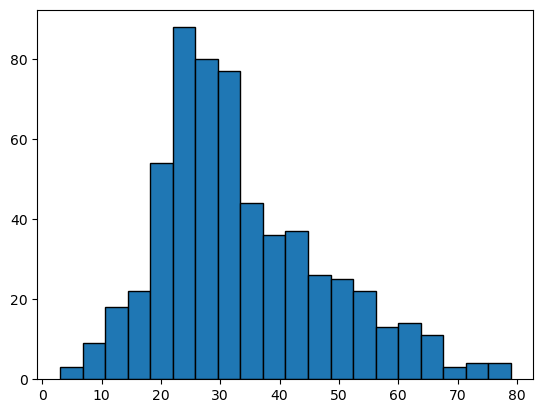

In [64]:
plt.hist(merged_data['Age'], bins=20, edgecolor='black')

In [65]:
age_sort = merged_data['Age'].value_counts().sort_values(ascending=True)

In [66]:
age_sort

Age
69     1
77     1
74     1
71     1
3      1
      ..
21    23
31    23
23    24
24    24
27    27
Name: count, Length: 72, dtype: int64

In [67]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 590 entries, Sample 1 to Sample 590
Columns: 14186 entries, ACADS to Sick
dtypes: float64(14182), int64(4)
memory usage: 63.9+ MB


In [68]:
merged_data.dtypes

ACADS            float64
ACADVL           float64
ACAT1            float64
PSEN1            float64
ADA              float64
                  ...   
LINC00700        float64
Age                int64
Sex                int64
Disease_Label      int64
Sick               int64
Length: 14186, dtype: object

In [69]:
merged_data.describe()

,ACADS,ACADVL,ACAT1,PSEN1,ADA,ADRB2,ADRB3,ADSL,AGA,ALAD,...,LINC01721,PCAT19,ANKRD20A5P,LINC00547,LINC00941,LINC00700,Age,Sex,Disease_Label,Sick
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,...,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,104.376011,260.546880,81.153053,1309.065766,193.106490,312.373458,10.860166,316.965241,109.436941,302.101537,...,10.905003,45.526035,20.844835,12.063603,153.485701,65.411488,33.533898,0.510169,0.830508,0.547458
std,30.233483,76.707549,25.967558,451.823825,72.639080,129.042253,6.837231,71.229761,35.346704,81.263358,...,18.911705,41.082031,19.428659,29.835634,80.568396,52.039311,14.171327,0.500321,0.841467,0.498165
min,38.114747,100.074981,24.490479,556.036583,31.194862,83.644566,0.000000,120.462388,35.687484,152.993056,...,0.000000,3.954598,0.000000,0.000000,27.912020,10.670930,3.000000,0.000000,0.000000,0.000000
25%,84.205056,210.166095,63.425427,1025.252554,147.660082,224.511334,6.167740,269.235834,85.558275,252.187657,...,3.696701,27.380270,9.534254,2.248853,112.539150,42.217968,23.000000,0.000000,0.000000,0.000000
50%,101.076508,248.127146,77.653600,1247.341073,182.225512,290.035522,9.688181,307.163859,106.121903,291.361520,...,5.785719,34.160120,15.653765,3.936362,132.204700,50.999225,31.000000,1.000000,1.000000,1.000000
75%,122.929800,291.432418,94.567125,1491.240016,225.621537,371.293289,14.485238,356.278757,126.965860,338.029484,...,8.942973,43.658228,24.807630,6.332934,160.412000,62.625235,42.000000,1.000000,2.000000,1.000000
max,265.353851,630.814710,189.616641,5317.682564,659.559722,1263.386021,63.472086,643.749731,323.124104,876.284811,...,172.058000,327.590700,143.766400,313.981600,710.624200,416.934500,79.000000,1.000000,2.000000,1.000000


In [70]:
merged_data.drop('Disease_Label', axis=1, inplace=True)

In [71]:
merged_data

,ACADS,ACADVL,ACAT1,PSEN1,ADA,ADRB2,ADRB3,ADSL,AGA,ALAD,...,LOC100506123,LINC01721,PCAT19,ANKRD20A5P,LINC00547,LINC00941,LINC00700,Age,Sex,Sick
Source Name,,,,,,,,,,,,,,,,,,,,,
Sample 1,71.394731,202.285072,51.923441,1502.534571,155.770323,236.900699,4.326953,283.415448,122.236434,257.453728,...,188.2225,3.245215,33.53389,23.798240,0.000000,175.24160,55.16866,34,1,1
Sample 2,104.829005,308.215194,71.677952,1245.404416,215.033856,267.000371,6.271821,268.792320,120.956544,275.960115,...,225.7855,8.959744,27.77521,13.439620,1.791949,116.47670,42.11080,49,0,0
Sample 3,173.466488,271.920441,80.872890,930.624269,257.855591,470.000418,16.408992,350.449189,134.788150,364.514040,...,294.1898,5.860354,21.09728,39.850410,2.344142,80.87289,26.95763,27,1,0
Sample 4,103.796604,232.756022,80.992805,754.098056,247.696442,394.741631,6.290703,419.118106,61.334357,319.253192,...,379.8012,7.077041,38.53056,18.872110,0.786338,99.07858,40.10323,9,1,0
Sample 5,83.472519,219.115362,57.861632,1089.885502,145.128357,181.173308,11.382616,315.867600,113.826162,239.983492,...,518.8576,48.376120,129.95150,29.405090,36.993500,350.01540,207.73270,34,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample 586,147.529335,278.935246,71.749240,1035.123862,216.860061,388.574534,11.286397,366.807910,112.863972,274.098219,...,232.9835,4.837027,24.99131,24.991310,4.030856,91.09735,42.72708,25,1,1
Sample 587,94.187393,306.109028,53.515564,1343.240664,172.320117,187.304475,6.421868,278.280934,126.296732,323.234008,...,180.8826,3.210934,34.24996,11.773420,8.562490,107.03110,62.07805,44,1,0
Sample 588,87.027568,230.201954,45.853235,2358.166354,111.357856,363.082756,10.293583,320.036862,79.541325,230.201954,...,126.3303,6.550462,33.68809,4.678901,2.807341,174.99090,46.78901,36,0,1


In [72]:
X = merged_data.iloc[:, :-3]

In [73]:
X

,ACADS,ACADVL,ACAT1,PSEN1,ADA,ADRB2,ADRB3,ADSL,AGA,ALAD,...,ALOX12-AS1,CYP21A1P,LOC100506990,LOC100506123,LINC01721,PCAT19,ANKRD20A5P,LINC00547,LINC00941,LINC00700
Source Name,,,,,,,,,,,,,,,,,,,,,
Sample 1,71.394731,202.285072,51.923441,1502.534571,155.770323,236.900699,4.326953,283.415448,122.236434,257.453728,...,493.2727,18.389550,100.60170,188.2225,3.245215,33.53389,23.798240,0.000000,175.24160,55.16866
Sample 2,104.829005,308.215194,71.677952,1245.404416,215.033856,267.000371,6.271821,268.792320,120.956544,275.960115,...,422.8999,42.110800,68.09405,225.7855,8.959744,27.77521,13.439620,1.791949,116.47670,42.11080
Sample 3,173.466488,271.920441,80.872890,930.624269,257.855591,470.000418,16.408992,350.449189,134.788150,364.514040,...,307.0826,4.688283,104.31430,294.1898,5.860354,21.09728,39.850410,2.344142,80.87289,26.95763
Sample 4,103.796604,232.756022,80.992805,754.098056,247.696442,394.741631,6.290703,419.118106,61.334357,319.253192,...,392.3826,3.931690,69.19774,379.8012,7.077041,38.53056,18.872110,0.786338,99.07858,40.10323
Sample 5,83.472519,219.115362,57.861632,1089.885502,145.128357,181.173308,11.382616,315.867600,113.826162,239.983492,...,352.8611,128.054400,115.72330,518.8576,48.376120,129.95150,29.405090,36.993500,350.01540,207.73270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample 586,147.529335,278.935246,71.749240,1035.123862,216.860061,388.574534,11.286397,366.807910,112.863972,274.098219,...,336.1734,12.898740,80.61712,232.9835,4.837027,24.99131,24.991310,4.030856,91.09735,42.72708
Sample 587,94.187393,306.109028,53.515564,1343.240664,172.320117,187.304475,6.421868,278.280934,126.296732,323.234008,...,325.3746,5.351556,96.32802,180.8826,3.210934,34.24996,11.773420,8.562490,107.03110,62.07805
Sample 588,87.027568,230.201954,45.853235,2358.166354,111.357856,363.082756,10.293583,320.036862,79.541325,230.201954,...,417.3580,10.293580,78.60555,126.3303,6.550462,33.68809,4.678901,2.807341,174.99090,46.78901


In [74]:
X.columns = X.columns.astype(str)

In [75]:
y = merged_data['Sick']

In [76]:
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, train_test_split

In [77]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=0)

In [78]:
X_train1

,ACADS,ACADVL,ACAT1,PSEN1,ADA,ADRB2,ADRB3,ADSL,AGA,ALAD,...,ALOX12-AS1,CYP21A1P,LOC100506990,LOC100506123,LINC01721,PCAT19,ANKRD20A5P,LINC00547,LINC00941,LINC00700
Source Name,,,,,,,,,,,,,,,,,,,,,
Sample 286,105.375073,203.896483,89.954331,1099.156252,243.305047,275.003240,5.140247,356.390492,85.670791,246.731879,...,325.5490,5.996955,72.82017,298.99110,4.283540,27.41465,16.277450,3.426832,113.94220,37.69515
Sample 114,124.853743,272.876222,69.506207,1148.139574,146.735327,184.062734,10.297216,218.815838,74.654815,399.017116,...,422.1859,18.020130,113.26940,158.31970,1.287152,38.61456,9.010064,2.574304,127.42800,42.47602
Sample 19,140.267903,256.565975,43.500805,1236.665753,234.371686,269.882548,8.877715,266.331461,68.358408,331.138784,...,432.3447,13.316570,61.25624,158.02330,3.551086,28.40869,17.755430,4.438858,126.06360,56.81738
Sample 77,114.282529,407.442059,39.750445,2418.152057,124.220140,298.128336,6.625074,260.034160,109.313723,341.191318,...,390.8794,9.937611,61.28194,56.31313,9.937611,21.53149,4.968806,1.656269,139.12660,41.40671
Sample 207,132.117816,284.431985,106.872373,988.779831,275.175323,541.093984,1.683029,278.541382,138.008419,411.500713,...,307.1529,9.256662,52.17391,187.65780,4.207574,21.03787,23.562410,4.207574,81.62693,35.34362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample 278,66.505284,291.999762,57.152978,1289.579020,334.604710,561.138333,8.313160,269.138571,107.031941,326.291549,...,331.4873,15.587180,128.85400,207.82900,5.195725,51.95725,6.234870,5.195725,158.98920,44.68324
Sample 10,76.696681,203.943448,67.109596,911.644642,113.301915,308.529831,3.486213,256.236639,99.357064,278.897022,...,457.5654,24.403490,109.81570,191.74170,4.357766,47.93543,24.403490,6.100872,201.32880,82.79755
Sample 360,112.255524,260.661132,102.742344,706.829275,175.042512,324.399439,2.853954,404.310151,134.135838,294.908581,...,303.4704,9.513180,120.81740,331.05870,6.659226,42.80931,22.831630,2.853954,124.62270,50.41985


In [79]:
y_train1

Source Name
Sample 286    0
Sample 114    0
Sample 19     0
Sample 77     1
Sample 207    0
             ..
Sample 278    0
Sample 10     1
Sample 360    1
Sample 193    0
Sample 560    1
Name: Sick, Length: 413, dtype: int64

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1.astype(np.float64))

In [81]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

# Set up stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define models
logreg_no_penalty = LogisticRegression(max_iter=10000)
logreg_with_penalty = LogisticRegression(penalty='l2', max_iter=10000)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# List of models to evaluate
models = {
    "Logistic Regression (No Penalty)": logreg_no_penalty,
    "Logistic Regression (L2 Penalty)": logreg_with_penalty,
    "Random Forest": random_forest
}

# Iterate over models, perform cross-validation, and print the mean accuracy
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train1, y_train1, cv=skf, scoring='accuracy')
    print(f"{model_name}: Mean accuracy = {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


Logistic Regression (No Penalty): Mean accuracy = 0.7071 (+/- 0.0438)
Logistic Regression (L2 Penalty): Mean accuracy = 0.7071 (+/- 0.0438)
Random Forest: Mean accuracy = 0.7675 (+/- 0.0342)
